In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load data
data = pd.read_csv('Downloads/archive (3)/data.csv')

In [4]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517225.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443878.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1104135.0,"AG, AR, BA, BB, BG, BO, BS, BZ, CL, CO, CR, CZ..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,259071.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,735274.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."


In [5]:
# Set up plot aesthetics
sns.set(style="whitegrid")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               5504 non-null   object 
 1   type                5732 non-null   object 
 2   genres              5606 non-null   object 
 3   releaseYear         5718 non-null   float64
 4   imdbId              5372 non-null   object 
 5   imdbAverageRating   5309 non-null   float64
 6   imdbNumVotes        5309 non-null   float64
 7   availableCountries  5732 non-null   object 
dtypes: float64(3), object(5)
memory usage: 358.4+ KB


In [7]:
# Cleaning data
data_clean = data.dropna(subset=['imdbAverageRating', 'genres', 'releaseYear'])

In [8]:
# Converting releaseYear to integer for easier grouping
data_clean['releaseYear'] = data_clean['releaseYear'].astype(int)

C:\Users\TOSHIBA SATELLITE\AppData\Local\Temp\ipykernel_3108\795557106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['releaseYear'] = data_clean['releaseYear'].astype(int)


In [9]:
# Top 10 genres by average IMDb rating
# Splitting genres into separate rows
data_genres = data_clean.assign(genres=data_clean['genres'].str.split(', ')).explode('genres')
genre_avg_rating = data_genres.groupby('genres')['imdbAverageRating'].mean().sort_values(ascending=False).head(10)

In [10]:
data_genres

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,Action,1997,tt0119116,7.6,517225.0,"DK, FI, NO, SE"
0,The Fifth Element,movie,Adventure,1997,tt0119116,7.6,517225.0,"DK, FI, NO, SE"
0,The Fifth Element,movie,Sci-Fi,1997,tt0119116,7.6,517225.0,"DK, FI, NO, SE"
1,Unforgiven,movie,Drama,1992,tt0105695,8.2,443878.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
1,Unforgiven,movie,Western,1992,tt0105695,8.2,443878.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
...,...,...,...,...,...,...,...,...
5723,Like Water for Chocolate,tv,Romance,2024,tt29258436,7.7,135.0,"AR, ES, US"
5724,Hero Inside,tv,Action,2023,tt24165980,7.7,226.0,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."
5724,Hero Inside,tv,Animation,2023,tt24165980,7.7,226.0,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."
5724,Hero Inside,tv,Comedy,2023,tt24165980,7.7,226.0,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


In [11]:
genre_avg_rating

genres
Kids           8.900000
Film-Noir      7.650000
Reality        7.341176
News           7.262500
War            7.160656
Biography      7.084591
History        7.080000
Documentary    6.968154
Sport          6.961364
Western        6.931818
Name: imdbAverageRating, dtype: float64

In [12]:
# Analysis 2: Distribution of IMDb ratings
rating_dist = data_clean['imdbAverageRating']

In [13]:
rating_dist

0       7.6
1       8.2
2       8.3
3       7.4
4       8.3
       ... 
5720    7.3
5722    6.7
5723    7.7
5724    7.7
5725    7.3
Name: imdbAverageRating, Length: 5302, dtype: float64

In [14]:
# Analysis 3: IMDb ratings over time
ratings_by_year = data_clean.groupby('releaseYear')['imdbAverageRating'].mean()

In [15]:
ratings_by_year

releaseYear
1903    6.600000
1906    6.300000
1909    6.300000
1928    8.100000
1931    7.400000
          ...   
2020    6.587025
2021    6.621600
2022    6.512668
2023    6.387097
2024    6.565493
Name: imdbAverageRating, Length: 87, dtype: float64

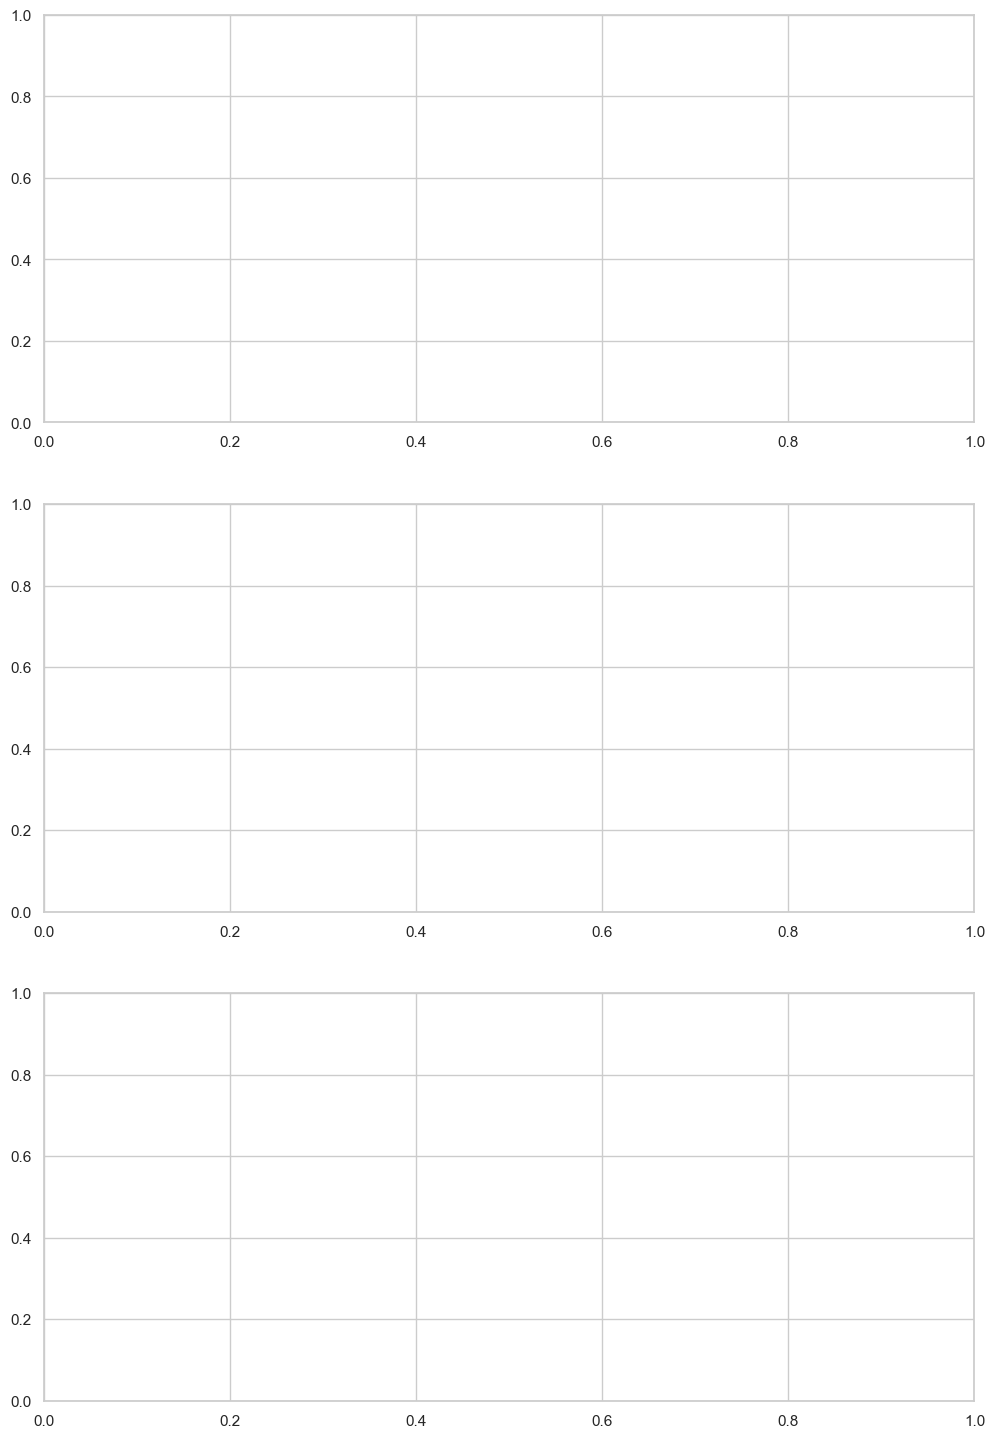

In [16]:
# Plotting results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


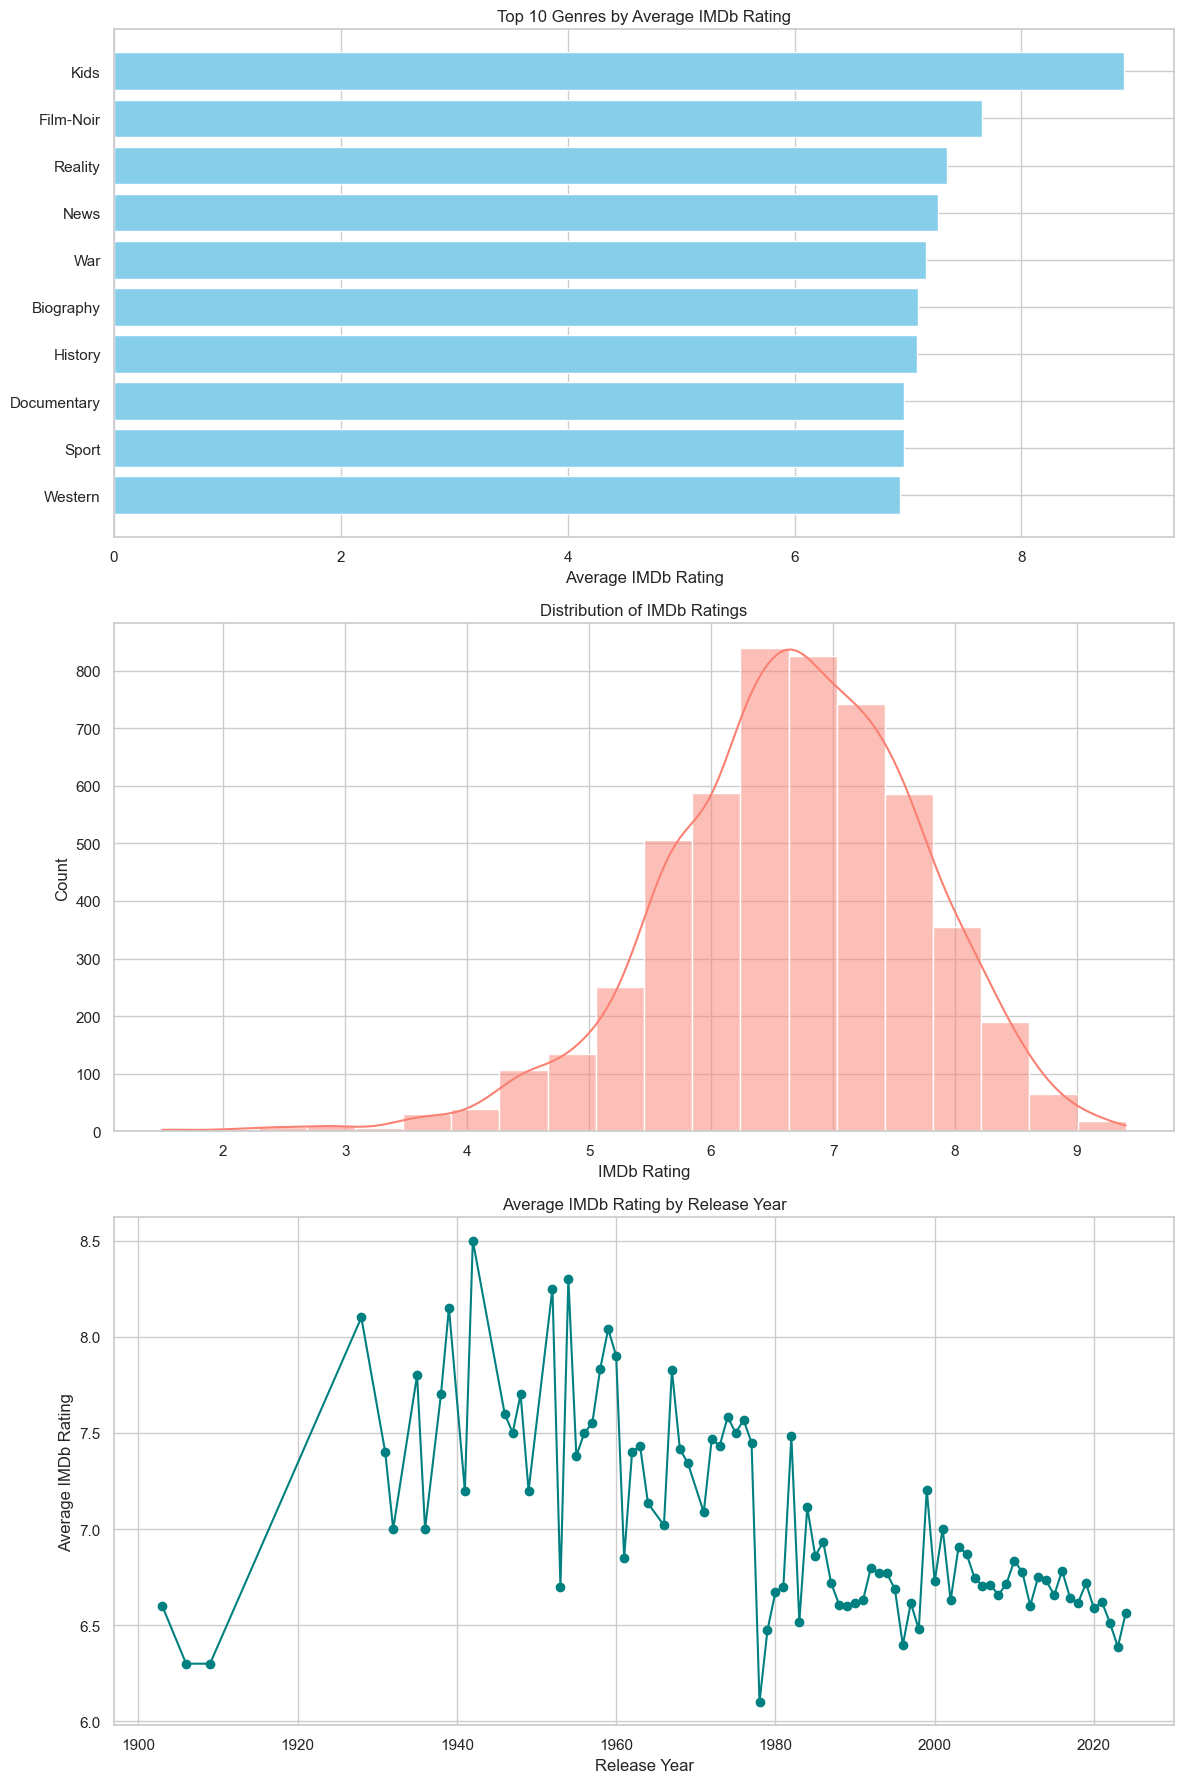

In [17]:
# Plotting results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Top 10 genres by IMDb rating
axs[0].barh(genre_avg_rating.index, genre_avg_rating.values, color='skyblue')
axs[0].set_title("Top 10 Genres by Average IMDb Rating")
axs[0].set_xlabel("Average IMDb Rating")
axs[0].invert_yaxis()

# Plot 2: IMDb rating distribution
sns.histplot(rating_dist, bins=20, kde=True, ax=axs[1], color="salmon")
axs[1].set_title("Distribution of IMDb Ratings")
axs[1].set_xlabel("IMDb Rating")

# Plot 3: Average IMDb rating by release year
axs[2].plot(ratings_by_year.index, ratings_by_year.values, marker='o', color='teal')
axs[2].set_title("Average IMDb Rating by Release Year")
axs[2].set_xlabel("Release Year")
axs[2].set_ylabel("Average IMDb Rating")

plt.tight_layout()
plt.show()


C:\Users\TOSHIBA SATELLITE\AppData\Local\Temp\ipykernel_3108\1530773878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['releaseYear'] = data_clean['releaseYear'].astype(int)


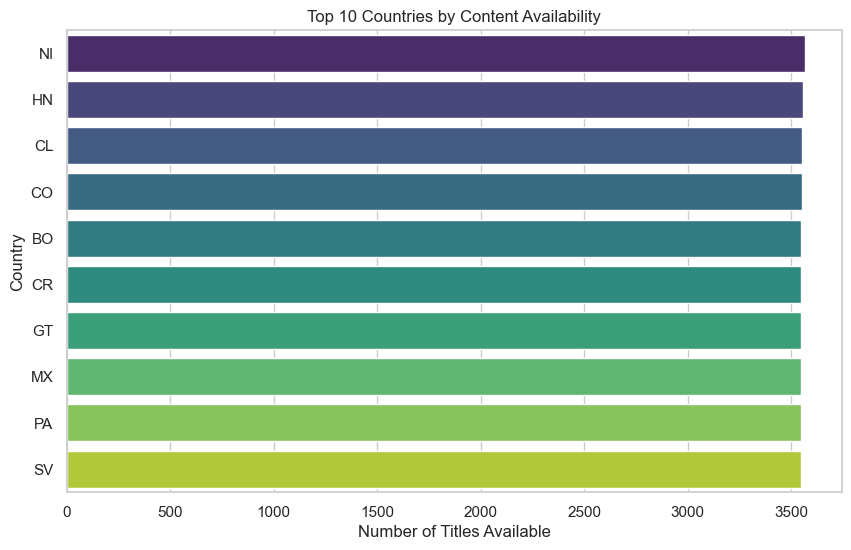

In [36]:


# Convert releaseYear to integer for easier grouping
data_clean['releaseYear'] = data_clean['releaseYear'].astype(int)

### Top Countries by Content Availability ###
# Counting occurrences of each country in availableCountries
from collections import Counter
country_counts = Counter(", ".join(data_clean['availableCountries'].dropna()).split(", "))
top_countries = pd.DataFrame(country_counts.most_common(10), columns=['Country', 'ContentCount'])

# Plot Top Countries by Content Availability
plt.figure(figsize=(10, 6))
sns.barplot(x='ContentCount', y='Country', data=top_countries, palette="viridis")
plt.title("Top 10 Countries by Content Availability")
plt.xlabel("Number of Titles Available")
plt.ylabel("Country")
plt.show()




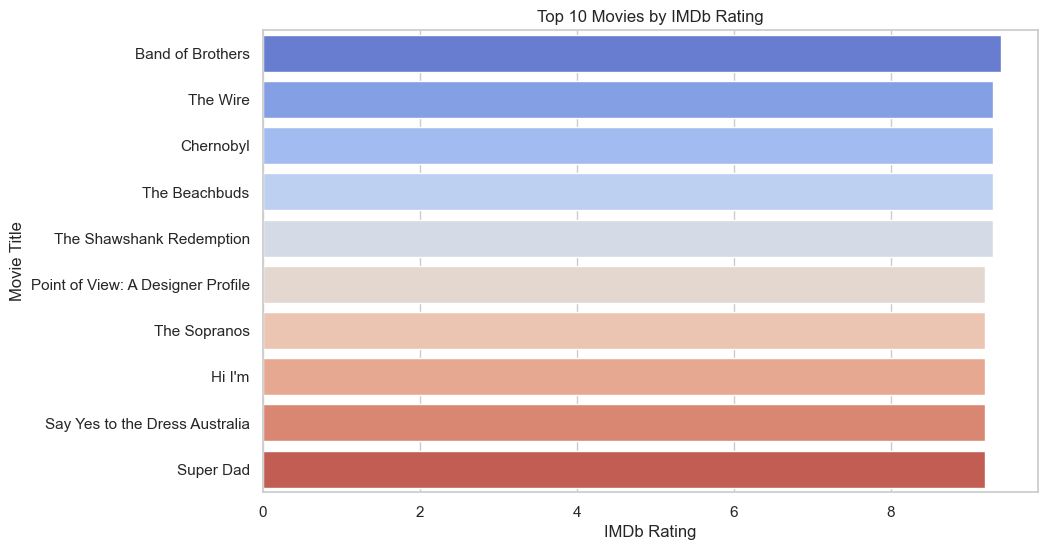

In [38]:
### Top 10 Movies by IMDb Rating ###
top_movies = data_clean[['title', 'imdbAverageRating']].sort_values(by='imdbAverageRating', ascending=False).head(10)

# Plot Top 10 Movies by IMDb Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='imdbAverageRating', y='title', data=top_movies, palette="coolwarm")
plt.title("Top 10 Movies by IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Title")
plt.show()



C:\Users\TOSHIBA SATELLITE\AppData\Local\Temp\ipykernel_3108\2297945736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean['releaseYear'] // 10) * 10
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


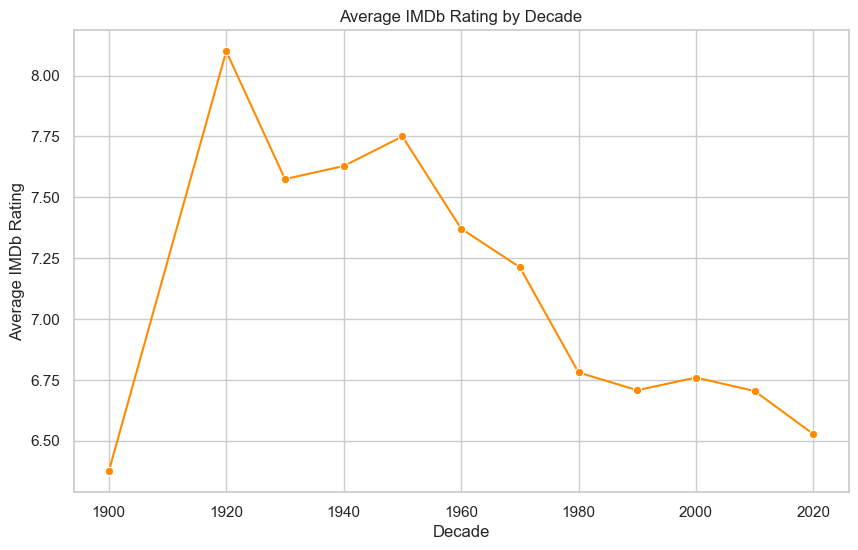

In [40]:
### Average Rating by Decade ###
# Grouping data by decade
data_clean['Decade'] = (data_clean['releaseYear'] // 10) * 10
rating_by_decade = data_clean.groupby('Decade')['imdbAverageRating'].mean()

# Plot Average Rating by Decade
plt.figure(figsize=(10, 6))
sns.lineplot(x=rating_by_decade.index, y=rating_by_decade.values, marker="o", color="darkorange")
plt.title("Average IMDb Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average IMDb Rating")
plt.grid(True)
plt.show()



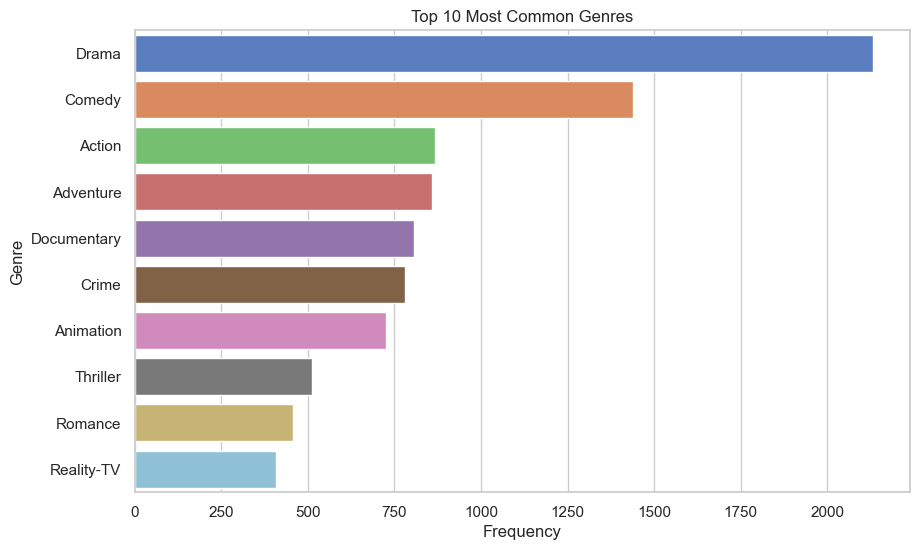

In [42]:
### Most Common Genres ###
# Counting genres
genre_counts = data_genres['genres'].value_counts().head(10)

# Plot Most Common Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="muted")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

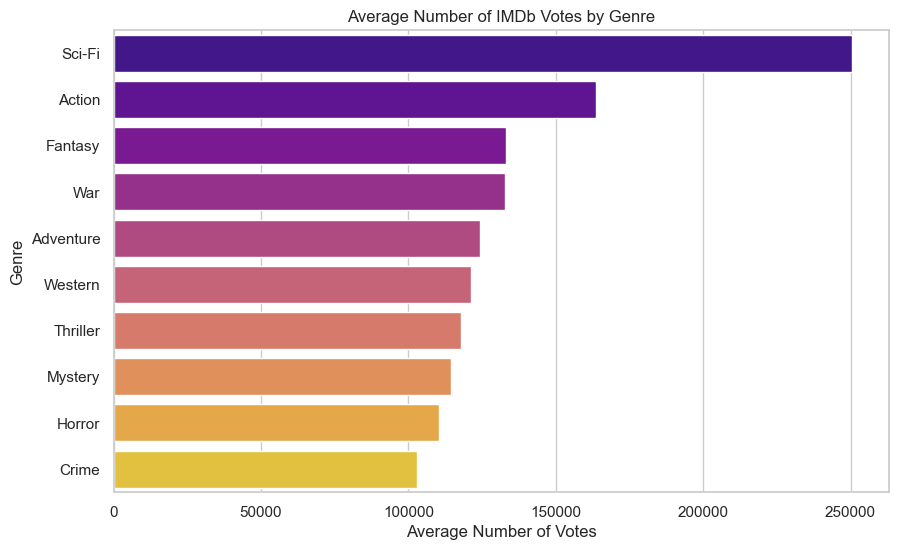

In [44]:


### Average Number of Votes by Genre ###
# Split genres into individual rows
data_genres = data_clean.assign(genres=data_clean['genres'].str.split(', ')).explode('genres')
genre_vote_avg = data_genres.groupby('genres')['imdbNumVotes'].mean().sort_values(ascending=False).head(10)

# Plot Average Number of Votes by Genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_vote_avg.values, y=genre_vote_avg.index, palette="plasma")
plt.title("Average Number of IMDb Votes by Genre")
plt.xlabel("Average Number of Votes")
plt.ylabel("Genre")
plt.show()



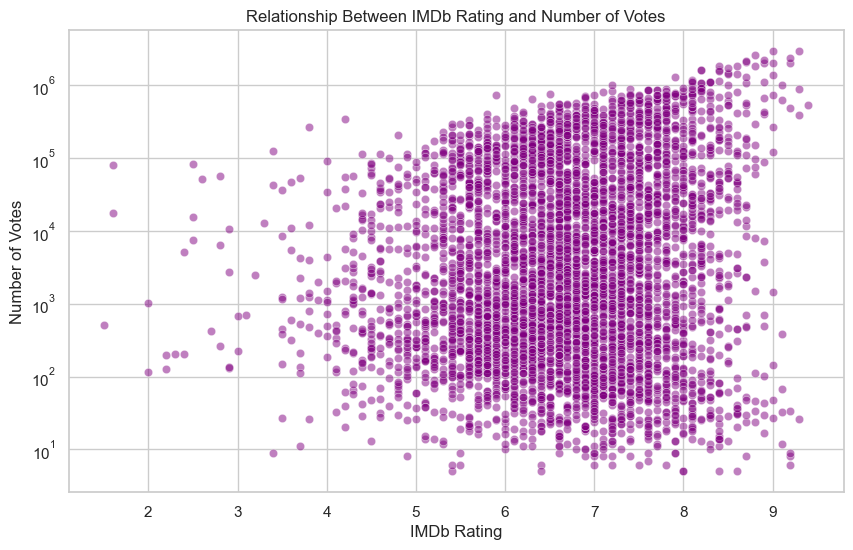

In [46]:
### Relationship Between IMDb Rating and Number of Votes ###
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clean['imdbAverageRating'], y=data_clean['imdbNumVotes'], alpha=0.5, color='purple')
plt.title("Relationship Between IMDb Rating and Number of Votes")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Votes")
plt.yscale('log')  # Log scale to handle outliers
plt.show()



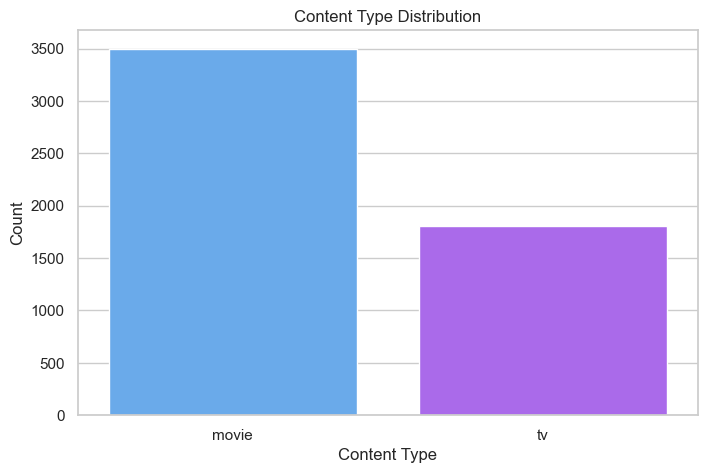

In [48]:
### Content Type Analysis ###
# Count of each content type (e.g., movie vs. series)
content_type_counts = data_clean['type'].value_counts()

# Plot Content Type Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette="cool")
plt.title("Content Type Distribution")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()




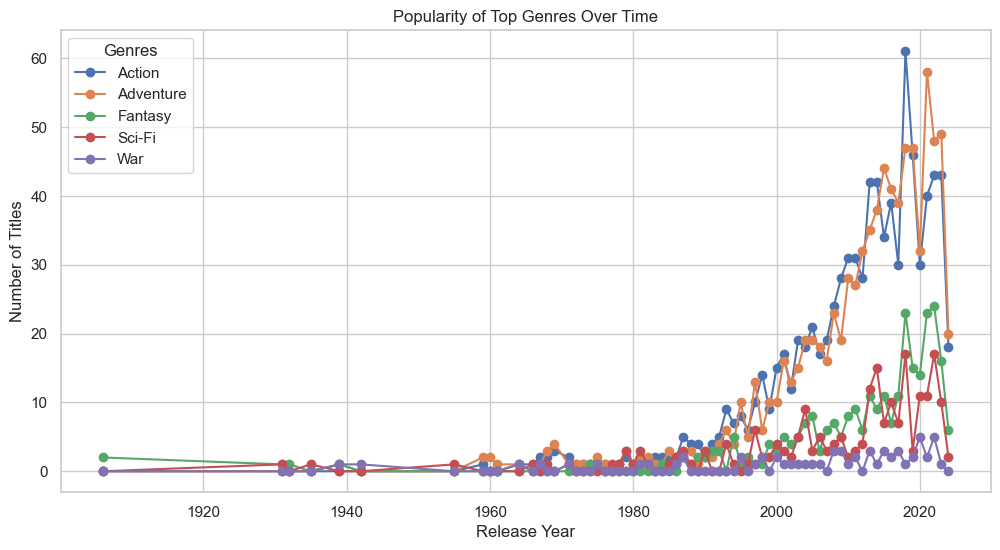

In [50]:
### Popular Genres Over Time ###
# Focus on top 5 genres
top_genres = genre_vote_avg.index[:5]
data_top_genres = data_genres[data_genres['genres'].isin(top_genres)]
popularity_over_time = data_top_genres.groupby(['releaseYear', 'genres']).size().unstack().fillna(0)

# Plot Popular Genres Over Time
plt.figure(figsize=(12, 6))
popularity_over_time.plot(ax=plt.gca(), marker='o')
plt.title("Popularity of Top Genres Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genres")
plt.grid(True)
plt.show()